Подключение библиотек.

In [396]:
%matplotlib inline
import numpy as np
from scipy.stats import multivariate_normal
from scipy.spatial.distance import mahalanobis
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import expon
from scipy.stats import norm
import scipy.stats as stats

Ввод данных.

In [397]:
data = [0.0436794, 0.166035, 0.0604577, 0.0962837, 0.023529, 0.11326, \
0.404622, 0.354139, 0.308872, 0.032605, 0.098301, 0.426906, 0.434665, \
0.35626, 1.90448, 0.818334, 0.486652, 1.59797, 0.0825811, 0.254232, \
0.220093, 0.251865, 0.368748, 1.8966, 0.752856, 0.378332, 0.944809, \
0.994282, 0.061186, 0.000524252, 0.0606311, 0.0729079, 1.07185, \
1.43861, 0.60779, 1.02583, 1.0875, 0.27009, 0.0328377, 0.791727, \
0.247701, 0.00471008, 0.0103316, 0.185637, 0.113057, 0.716332, \
1.05568, 0.207986, 0.887598, 0.535853, 0.876685, 0.315642, 0.0141932, \
0.0937924, 0.305066, 0.202327, 0.524695, 0.00939518, 0.516412, \
0.620611, 0.0967764, 0.0163088, 0.316691, 0.336694, 0.229255, \
0.826508, 0.276018, 0.243225, 1.26453, 0.955482, 0.491383, 0.182187, \
0.128007, 0.170854, 0.424113, 0.0838754, 0.137054, 0.131947, \
0.504065, 0.0496643, 0.171981, 0.784873, 0.95644, 0.575638, \
0.0665862, 0.16751, 0.379834, 0.228268, 0.388329, 0.94044, 0.0440389, \
0.303095, 0.36334, 1.14763, 0.213201, 0.396905, 0.250873, 0.150599, \
0.2895, 1.16509, 0.265498, 0.560802, 0.363842, 0.0354809, 0.0287385, \
0.404331, 0.117715, 0.205864, 0.0535385, 0.443829, 0.0955239, \
0.0435538, 0.101079, 0.653438, 0.908184, 0.583681, 0.200702, \
0.214355, 0.0032679, 0.0244118, 0.329929, 0.499287, 0.420374, \
0.0851347, 0.175401, 0.177086, 0.106934, 0.023994, 0.00586, 0.123103, \
0.316923, 0.367377, 0.418499, 0.356524, 0.376066, 0.0201693, \
0.389433, 0.230155, 0.579766, 0.896395, 0.218018, 0.0531565, \
0.317389, 0.370752, 0.371218, 0.375285, 0.677023, 0.0246592, \
0.345195, 0.0115658, 0.814462, 0.00657833, 0.176033, 0.612912, \
0.319484, 0.129894, 0.532801, 0.0571202, 0.0425041, 0.669363, \
0.499122, 0.544739, 0.201162, 0.332702, 0.440401, 0.538023, 0.125401, \
1.08728, 0.423711, 0.903539, 0.221519, 0.11238, 0.158885, 0.963678, \
0.280555, 0.48023, 0.288202, 0.100392, 0.129658, 0.0755764, 0.126633, \
0.0142448, 0.518066, 0.535232, 0.0371798, 0.574612, 0.147001, \
0.30566, 0.275454, 0.320081, 0.0720025, 0.00208185, 0.245711, \
0.215984, 1.04385, 0.240841, 0.584268, 0.79101, 0.0847973, 0.982576
]

**Задание 1. Построение гистограммы по правилу Стерджеса.**

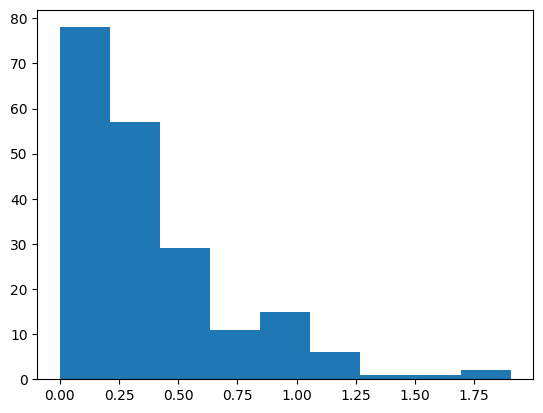

In [398]:
plt.hist(data, "sturges")
plt.show()

**Задание 2. Построение графиков гипотетических плотностей распределения.**

Ищем тетта с крышкой для нормального распределения (метод максимального правдоподобия).

In [399]:
norm_sd = 0.25
thetta_0 = norm.fit(data, fscale = norm_sd) 
norm_mu = thetta_0[0]
norm_mu

0.38020772696

Ищем тетта с крышкой для экспоненциального распределения (метод максимального правдоподобия).

In [400]:
thetta_1 = expon.fit(data, floc = 0) 
expon_mu = thetta_1[1]
1 / expon_mu

2.6301411809687014

График плотности распределения для нормального распределения.

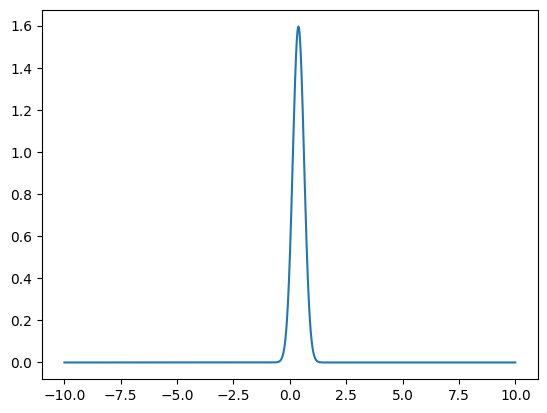

In [401]:
x_axis = np.arange(-10, 10, 0.001)
plt.plot(x_axis, norm.pdf(x_axis, norm_mu, norm_sd))
plt.show()

График плотности распределения для экспоненциального распределения.

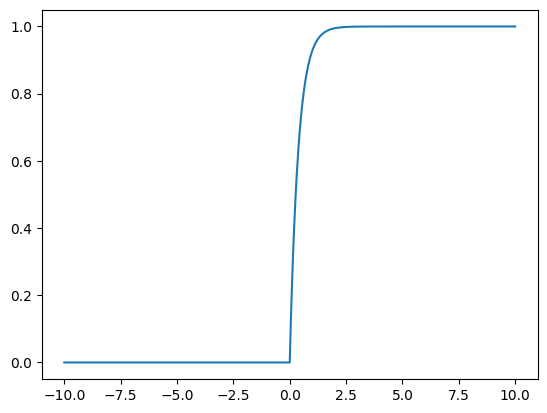

In [402]:
plt.plot(x_axis, expon.cdf(x_axis, scale = expon_mu))
plt.show()

**Задание 3. Критерий хи-квадрат.**

Построение разбиения.

In [403]:
x0 = np.NINF
x1 = 0.1
x2 = 0.3
x3 = 0.7
x4 = np.Inf
x = [x0, x1, x2, x3, x4]
x


[-inf, 0.1, 0.3, 0.7, inf]

Подсчёт количества значений из выборки в интервалах (частоты).

In [404]:
freq = np.empty(len(x) - 1, dtype=int)
for i in range(len(x) - 1):
    freq[i] = sum(x[i] < j <= x[i + 1] for j in data)
freq

array([46, 55, 66, 33])

Подсчёт теоретических частот для нормального распределения.

In [405]:
exp_freq = np.empty(len(x) - 1, dtype=float)
for i in range(len(x) - 1):
    exp_freq[i] = (norm.cdf(x[i + 1], loc = norm_mu, scale = norm_sd) - norm.cdf(x[i], loc = norm_mu, scale = norm_sd)) * len(data)
exp_freq

array([ 26.23598452,  48.59786903, 105.08239472,  20.08375173])

Критические значения из таблиц.

In [406]:
alpha_1 = 0.1
crit_val_1 = 6.251
print("Критическое значение для уровня значимости " + str(alpha_1) + ": " + str(crit_val_1))
alpha_2 = 0.02
crit_val_2 = 9.837
print("Критическое значение для уровня значимости " + str(alpha_2) + ": " + str(crit_val_2))

Критическое значение для уровня значимости 0.1: 6.251
Критическое значение для уровня значимости 0.02: 9.837


Проверка статистики.

In [407]:
chis, p = stats.chisquare(freq, exp_freq)
print("Значение статистики: " + str(chis))
if (chis > crit_val_1):
    print("Гипотеза о нормальном распределении отклонена для уровня значимости " + str(alpha_1))
else:
    print("Гипотеза о нормальном распределении принята для уровня значимости " + str(alpha_1))

if (chis > crit_val_2):
    print("Гипотеза о нормальном распределении отклонена для уровня значимости " + str(alpha_2))
else:
    print("Гипотеза о нормальном распределении принята для уровня значимости " + str(alpha_2))

Значение статистики: 38.57423596978156
Гипотеза о нормальном распределении отклонена для уровня значимости 0.1
Гипотеза о нормальном распределении отклонена для уровня значимости 0.02


Подсчёт теоретических частот для экспоненциального распределения.

In [408]:
for i in range(len(x) - 1):
    exp_freq[i] = (expon.cdf(x[i + 1], scale = expon_mu) - expon.cdf(x[i], scale = expon_mu)) * len(data)
exp_freq

array([46.25379116, 62.89028365, 59.12732337, 31.72860183])

Проверка статистики.

In [409]:
chis, p = stats.chisquare(freq, exp_freq)
print("Значение статистики: " + str(chis))
if (chis > crit_val_1):
    print("Гипотеза об экспоненциальном распределении отклонена для уровня значимости " + str(alpha_1))
else:
    print("Гипотеза об экспоненциальном распределении принята для уровня значимости " + str(alpha_1))

if (chis > crit_val_2):
    print("Гипотеза об экспоненциальном распределении отклонена для уровня значимости " + str(alpha_2))
else:
    print("Гипотеза об экспоненциальном распределении принята для уровня значимости " + str(alpha_2))

Значение статистики: 1.8411093713116276
Гипотеза об экспоненциальном распределении принята для уровня значимости 0.1
Гипотеза об экспоненциальном распределении принята для уровня значимости 0.02
